<div class="jumbotron jumbotron-fluid">
  <div class="container">
    <h1 class="display-4">Machine Learning</h1>
      <h2 class="display-4">Introduction: Part I</h2>
      Overview and Philosophy
  </div>
</div>

## Outline
- What tasks can ML systems/models learn to perform?
- How do we determine model performance?
- How do ML systems experience the data they learn from?
- What are the limitations on learning?

The content of this notebook is largely structured around [Ch 5.1-5.4](https://www.deeplearningbook.org/contents/ml.html) of [Deep Learning](https://www.deeplearningbook.org/) (Goodfellow, Bengio, & Courville, 2016).

This notebook was written as a [RISE](https://rise.readthedocs.io/en/maint-5.5/) presentation, and the formatting may reflect that (e.g. repeated headings, arbitrary subdivisions).

## What is machine learning?

## What is a machine?

<img src='./img/danger.png'>

Nope.

## What is learning?
<div class="alert alert-block alert-info">
    <b>Improving <i>performance</i> (P) on some class of <i>tasks</i> (T) given <i>experience</i> (E).</b>
</div>

Models are often considered as "black boxes", where input is transformed by the model into output. Then the model can be thought of as a mathematical function that _maps_ points in the input space (e.g. points on the 2D plane, if the input is a vector of 2 real numbers) to corresponding points in the output space.    

In the terms of the definition given above, performing a _task_ means implementing a _certain_ transformation of inputs into outputs. ?Inputs might be considered as particular instances of a problem/task, and the model's output as its attempted solution. Then the goal of learning through _experience_ is to expose the model to many different examples of inputs while updating the internal structure/state of the model (e.g. the values of its parameters) to provide better solutions.

However, there are limits to thinking of ML systems in this way, which will be described later in this notebook.

<img src='./img/learning-1.png'/>

## The task, $T$
<div class="alert alert-block alert-warning">
    <b>What is the system learning to do?</b> 
</div>

Considering an artificial agent, such as a robot with an artificial brain. We might want it to perform tasks like

- Walking
- Holding a cup
- Avoiding an obstacle

As is also the case for evolved animals, tasks may be more abstract (or latent), involving inference or prediction but no immediate action in the world. For example, one such task might be stated as "am I currently looking at a dog?"

## The task, $T$

ML systems processing *examples* composed of _features_
  - Typically vectors $\mathbf{x}\in\mathbb{R}^n$ with $n$ features
  
For example, in a medical dataset the examples may correspond to patients or testing intervals, and the features may correspond to the values output by particular tests.

In our black box model, these vectors are individual inputs. In math notation, we say the model is a function that transforms inputs from the space $\mathbb{R}^n$ (e.g. $\mathbb{R}^2$ is the space of vectors on a 2D plane) to some space of outputs (left unspecified here). 

<div class="alert alert-block alert-warning">
\begin{equation*}
f:\mathbb{R}^n\rightarrow ?
\end{equation*}
</div>
<img src='./img/learning-1.png'>

### Classification
<div class="alert alert-block alert-info">
    <b>Which of $k$ categories does an input belong to?</b>
<br><br>
\begin{equation*}
f:\mathbb{R}^n\rightarrow\{1,\dots,k\}
\end{equation*}
</div>

- May also output distribution over classes, instead of a single unambiguous class.
- Sometimes values for certain features may be missing from the input vector. In this case, multiple functions (corresponding to different subsets of input features) may need to be learned. This is common in medicine where only a subset of tests tend to be performed for a given patient. 
- Example: Anomaly detection (e.g. spam, credit card fraud).

The famous MNIST dataset, which includes many examples of handwritten digits. Each example is a greyscale image with $28\times28=784$ pixels, corresponding to an input vector with 784 values. The prototypical task is to learn a function $f:\mathbb{R}^{784}\rightarrow\{0,1,\dots,9\}$ which can output the correct class (i.e. digit) for a given example.   

<img src='./img/MNIST.jpg'>
(<a href="https://doi.org/10.1016/S0031-3203(03)00085-2">Liu <i>et al.</i>, 2003</a>)

An example of an algorithm outputting a distribution rather than a single class. Note that when the examples are "between" digit classes (e.g. not quite 9 and not quite 7) the output distribution is ambiguous, but otherwise classifications have a high certainty. A 784-feature problem like MNIST classification is difficult to solve using traditional/hand-designed models, but artificial neural networks achieve excellent performance by implicitly learning the spatial structure (within the image) that determines whether an example is a member of a given class.

<img src='./img/MNIST.gif'>
(see <a href='https://inclass.kaggle.com/arunkumarramanan/awesome-ml-frameworks-and-mnist-classification'>this post</a>)

However, we shouldn't expect such a classification model to <i>understand numbers</i>, for example that $1+2=3$. This is beyond the scope of a simple image classification task. There is (presumably) nothing inherent to the handwritten form of digits that implies such mathematical knowledge—so it would not be learned as a natural side-effect of learning the handwritten structure—nor would that knowledge be of much use anyway in performing the visual classification task.     

Models don't automatically understand the intuitive associations humans make. They can only learn precisely what they have been designed/incentivized to learn.

The same principle of classification (& the success of neural networks) extends to images in general:

<img src='./img/classification.png'>
(Goodfellow <i>et al.</i>, 2016)

### Classification in neuroscience
- Neuron type from electrophysiology data
- Disease state from neuroimaging data (e.g. tumour in structural MRI)
- Arbitrary classes (e.g. "currently reaching" vs. "resting") from brain measurements (correlational!)

Images aren't the only possible inputs:

<img src='./img/gcn.png'>
(<a href="https://github.com/sarslancs/graph_saliency_maps">Arslan <i>et al.</i>, 2018</a>)

### Regression
<div class="alert alert-block alert-info">
    <b>What value (of some quantity) is associated with a given input?</b>
<br><br>
\begin{equation*}
f:\mathbb{R}^n\rightarrow\mathbb{R}
\end{equation*}
</div>

- Firing rate, survival time, gene expression...

### Structured output
- Output is a vector or some other structure with relationships between members.
  <br>$\rightarrow$ Technically subsumes all other mapping tasks, including regression and classification.

- Examples:
  - Partition of input (e.g. image segmentation)
  - Image captioning
  - Parsing sentences

#### Who's wearing my pajamas?
Example: Sentence parsing. Output is not a single number or class, but a tree structure (which may be encoded as a vector).
<img src='./img/parsing.png'>
(<a href="https://web.stanford.edu/~jurafsky/slp3/">Jurafsky & Martin, 2017</a>)

### Segmentation, annotation

Example: [DeepLabCut](https://www.mousemotorlab.org/deeplabcut). Automatic & robust tracking of parts in videos, using convolutional neural networks. 
<img src='./img/deeplabcut.gif'>
(Mathis <i>et al.</i>, 2018)

Example: cell counting. Performance was similar to human counters.
<img src='./img/astrocytes.webp'>
(<a href="https://www.nature.com/articles/s41598-018-31284-x">Suleymanova <i>al.</i>, 2018</a>)

### Transcription, translation

Translation: Input is a sentence in one language, output is a translated sentence.

<img src='./img/translation.png'>
(<a href="https://devblogs.nvidia.com/introduction-neural-machine-translation-gpus-part-3/">Cho, 2015</a>)

### Synthesis and sampling
- Generate examples *similar* to training data.
- Implicit distribution (no single "correct" output).

Example: Generative adversarial network that learns from examples of celebrity faces, and outputs similar-looking (but not identical/memorized/"real") faces. 
Note that GANs learn a (relatively) continuous space of faces, allowing for smooth transitions between samples.

<video src="./img/gan_faces.mp4" type="video/mp4" controls>Uh oh.</video><br>
(<a href="https://github.com/tkarras/progressive_growing_of_gans">Karras <i>et al.</i>, 2018</a>)

Bonus creepy ramen example.

<video src="./img/ramen.mp4" type="video/mp4" controls>Uh oh.</video><br>
(<a href='https://www.youtube.com/watch?v=Rnj2RLycHA4'>Kenji Doi</a>)

### Missing value imputation
- $\mathbf{x}\in\mathbb{R}^n$ with some $x_i$ missing
- Compare to sampling (partial).

This can be considered as a form of sampling, where instead of sampling complete examples, incomplete examples are given and missing values are sampled such that the "filled-in" example looks like the complete examples the model learned from.

### Denoising
- Predict clean example $\mathbf{x}\in\mathbb{R}^n$ given a corrupted example $\tilde{\mathbf{x}}\in\mathbb{R}^n$.
- Unknown corruption process; i.e. learn $p(\mathbf{x}|\tilde{\mathbf{x}})$

<img src='./img/denoising.png'>
(<a href="http://proceedings.mlr.press/v80/lehtinen18a.html">Lehtinen <i>et al.</i>, 2018</a>)

Note: The model can't generate information out of nothing!

### Probability mass/density estimation
- Implicitly subsumes other tasks
- Learn $p(\mathbf{x})$ $\rightarrow$ can perform other tasks <!-- (e.g. missing value imputation). -->

The outputs of classification models can be considered as points on a simplex, where all the coordinates sum to one. Either an unambiguous class is returned—corresponding to one of the points on the axes, where all the probability density is concentrated on a single class—or the point lies somewhere between them with the probability of membership spread between two or more of the possible classes (but still summing to one, since it must belong to one of the classes).

<img src='./img/simplex.png'>

## The performance measure, $P$
<div class="alert alert-block alert-warning">
    <b>How do we quantify how well the system is performing the task?</b>
</div>


- Quantitative
- Task-specific
- Choice not obvious <!-- penalize frequent small mistakes or infrequent large mistakes? Global vs. local errors? -->
- e.g. classification: accuracy and error rate (expected 0-1 loss)

- Choice not obvious: e.g. multiple ways to measure distance of output from target solution, e.g. L1 vs L2 norms (Manhattan vs. Euclidean distance).    
- Accuracy and error rate: proportion of right vs. wrong categorizations.

## The experience, $E$
<div class="alert alert-block alert-warning">
    <b>What learning method is used?</b>
</div>

- <b>Datasets</b>: collections of many examples/data points
- <b>Design matrix</b>
  - e.g. $\mathit{\mathbf{X}}\in\mathbb{R}^{150\times4}$ for 150 examples (rows), 4 features (columns).
  - Not always possible; heterogeneous examples described as sets: $$\{\mathbf{x}^{(1)},\mathbf{x}^{(2)},\dots,\mathbf{x}^{(m)}\}$$

"Heterogeneous examples": e.g. a dataset of images with different sizes, corresponding to feature vectors of different lengths.

### Unsupervised learning
- Experience a dataset with many features and learn useful structural properties
- Typically want to learn the entire probability distribution that generated the dataset (explicitly or not)
- Learn $p(\mathbf{x})$ from examples $\mathbf{x}$.
  - i.e. some subset of examples will be more probable than others, in the context of a given task. 

The "true"/target output is not given for each example, and can't be used to guide learning.    

Instead, learning rules are based on some principle of structure. For example, a clustering algorithm may be instructed to separate a set of points into 3 groups, based on some assumptions about grouping (e.g. how close two points must be to be considered part of the same cluster). 

### Unsupervised learning: Clustering
<img src='./img/clustering.png'>
(Image <a href='https://developers.google.com/machine-learning/clustering/clustering-algorithms'>reproduced from work</a> created and shared by Google and used according to terms described in the Creative Commons 4.0 Attribution License.)

### Supervised learning
- Each example experienced is associated with a label or target.
  - Labels may be simple numbers (e.g. class numbers) or more complex (e.g. correctly transcribed sentence).
- Learn $p(\mathbf{y}|\mathbf{x})$ from $(\mathbf{x},\mathbf{y})$ examples.

This is essentially learning by <i>prediction error</i>, if the model output is considered as a prediction and the difference between the output and the target as the error.

<img src='./img/supervised.png'>

### Supervised vs. unsupervised
- Chain rule: decompose unsupervised problem into $n$ supervised problems: 
$$p(\mathbf{x})=\prod_{i=1}^{n}p(\mathrm{x}_i|\mathrm{x}_1,\dots,\mathrm{x}_{i-1})$$
- Conditional probability: solve supervised problem by learning joint distribution
$$p(y|\mathbf{x})=\frac{p(\mathbf{x},y)}{\sum_{y^\prime}p(\mathbf{x},y^\prime)}$$

Traditionally, regression, classification, and structured output are considered supervised; density estimation is considered unsupervised.

### Other paradigms
- <b>Semi-supervised</b>: only some example labelled)
- <b>Multi-instance</b>: collections of examples labelled
- <b>Reinforcement learning</b>: feedback between learning system and experiences

Let's return to our black box model.

<img src='./img/learning-1.png'>

ML systems are often compared or contrasted with humans, in terms of their performance. They are also often modeled as black boxes. But how can we interpret human brains, in the context of the black box model?  

In an ML system we decide on some method to assess outputs, relate them to inputs, and allow the model to learn. For a nervous system, we might consider the consequences of our movements in the world to be the outputs, our senses to be the inputs, and that learning involves some kind of iterative cycle:

<img src='./img/learning-2.png'>

Using reinforcement learning terms:

<img src='./img/learning-3b.png'>

One more set of analogous terms which might help with the intuition for "models":

<img src='./img/learning-3.png'>

- These models are simplifications: the brain is not executing a single action/prediction in conjunction with a single observation/reward. Predictions/decisions/expectations are much more complex: hierarchical and entangled.
- What is "everything else"? That is, where do we draw the boundary that separates agent from environment?
  - For example, the brain renders actually simultaneous touch stimuli as subjectively simultaneous, even though nerve delays vary. These delays could be thought of as part of the brain's environment and subject to learning, if we draw the boundary at the top of the spinal cord.

<div class="alert alert-block alert-warning">
    <b>"the process of learning itself is not the task"</b>
</div>
(Goodfellow <i>et al.</i>, 2016)

For the brain, this isn't true. The brain has the ultimate responsibility of credit assignment: to decide which aspects of its decision making process resulted in which benefits it experienced. It doesn't only learn how to perform well on pre-ordained tasks, but also learns which tasks are even relevant. There may be supervision (e.g. by parents) but a brain is ultimately alone in determining how much trust to give different sources of information.

However, ML systems are _situated_ by the human decisions that design them. In the black box model, the credit assignment problem that relates the inputs and outputs and allows the model to be updated (i.e. learn) is only implicit. This is work done for the model by its designer, by deciding to use a certain learning method and set of data structures and algorithms. It is easy to take for granted the intuitions by which we interpret our models, but remember that our models do not partake in these intuitions unless we construct them to do so.

<img src='./img/learning-1.png'>

For many ML systems the black box model will remain useful. However, we can at least update it to reflect that a more complex model may be composed of simpler parts.

<img src='./img/learning-4.png'>

Remember that learning is enabled and limited by some connection between the parts of the black box model (e.g. see supervised learning diagram from earlier in presentation).

<img src='./img/learning-5.png'>

Here's an example of "work done by the designer", or about the relationship between human decisions about models and inputs. In the following figure, the same two clusters of data are represented in Cartesian and polar coordinates. However, a model that only has the capacity to draw a straight line for the cluster boundary can only accurately separate the clusters in the polar representation. 

When human researchers change inputs into a better form, or change the model itself to prefer the available form, they situate their model in human reasoning, and make it less like an autonomous brain. The more an ML system is expected to generalize <i>between tasks</i> (perhaps, the more like humans it is) the more it must incorporate this higher level of reasoning, rather than leaving it to human tweaking.

<div class="alert alert-block alert-warning">
    <b>What work are we doing for our models?</b>
</div>
<img src='./img/representations.png'>
(Goodfellow <i>et al.</i>, 2016)

## What is learning?


Some more examples of kinds of learning, to further illustrate that the black box model depends on specific assumptions about what the inputs and outputs are, and how they are connected by the chosen model.

In chemical evolution, simpler molecules react and sometimes produce more complex molecules that are also more persistent or self-preserving.

If we consider learning as model optimization, we can imagine chemical evolution as a kind of implicit unsupervised learning process. The input is a set of chemicals. The "model" is a transformation, a set of chemical reactions occurring in an interval of time. The output is a set of (transformed) chemicals at the end of the interval. If we imagine the process as directed, the "task" would be something like producing sets of chemicals that are more self-preserving—that have a longer survival time. But it's not directed, and might take millions of years to produce something a non-specialist would call complex and self-preserving.

### Evolution
  - Thermodynamics, metastability
  - Chemical to cellular to multicellular to nervous
  <img src='./img/chem_evolution.jpg'>
  (<a href="https://www.sciencedirect.com/science/article/pii/S1674987117301305">Kitadai & Maruyama, 2018</a>)

### Correlational learning
  - System does not reflect on causality.
    <br>$\rightarrow$ minimal ability to cope with changes in task/context
  - Often stereotyped/predictable responses.
  - Example: automatic entrainment of central circadian rhythm by the day-night cycle.
    <br>(The sun's light cycle has always been extremely predictable, excluding rare events like eclipses.)

### Correlation learning
#### Kalman filter
The simple Kalman filter can't reflect on the generating function for the signal it tracks (in this case, a sinusoidal function). It is condemned to continue processing all incoming samples and to lag slightly behind, never performing as well as a human could, even if the generating function remains the same forever.
<img src='./img/KalmanFilter.png'>
(<a href='https://simulationresearch.lbl.gov/modelica/'>Modelica Buildings Library</a>)

### Causal learning
  - Structure and abstractions
  - Planning and design
  <img src='./img/causal.jpg' style='width: 50%;'/>
  (<a href="https://www.sciencedirect.com/science/article/pii/S0166432809005099">Braun <i>et al.</i>, 2009</a>)

Simpler models tend to have built-in assumptions about structure and relevant variables and functions/transformations.    
More complex models may incorporate notions of causality, [bounded rationality](https://en.wikipedia.org/wiki/Bounded_rationality), and reinforcement learning. In such models, learning itself becomes part of the task. 

## Generalization
<div class="alert alert-block alert-info">
    <b>How does a model perform on previously unseen inputs?</b>
</div>

- Training vs. generalization error.
  - How does the model/system perform on examples it has already experienced?
  - How will it perform on previously unseen examples, after training? 
- How can the model learn about the underlying function/process that generates examples?
  - Available/training data and unavailable/test data are assumed to come from the same underlying process

To demonstrate, let's generate a couple of sets of examples from an underlying process, in this case represented by a simple function.

In [2]:
import numpy as np
import matplotlib.pyplot as plt  

In [3]:
# general quadratic function; a specific instance will serve as our generating function
def quadratic(x, loc=0., scale=1.):
    return scale * (x - loc)**2

In [4]:
from functools import partial

loc, scale = 0.5, -1.0

# a little trick to fix the parameters of this function for our specific case
gen_func = partial(quadratic, loc=loc, scale=scale)

In [5]:
def get_dataset(N, gen_func, noise_scale, domain=(0.0, 1.0)):
    """Get a set of `N` examples from `gen_func`, uniformly sampled across `domain`
    and corrupted by Gaussian noise."""
    # uniformly sample across example domain
    x = np.random.uniform(*domain, size=N)

    # take value of generating function at sampled locations
    # & corrupt with Gaussian noise
    noise = np.random.normal(loc=0.0, scale=noise_scale, size=N)
    y = gen_func(x) + noise
    
    return x, y

In [6]:
N, N_test = 20, 20  # number of examples in training and test sets
noise_scale = 0.025  # SD of Gaussian noise added to generating distribution

x, y = get_dataset(N, gen_func, noise_scale)
x_test, y_test = get_dataset(N_test, gen_func, noise_scale)

In [7]:
# sample the (uncorrupted) generating function on a regular grid, for plotting
x_grid = np.linspace(0, 1, 100)
y_true = gen_func(x_grid)

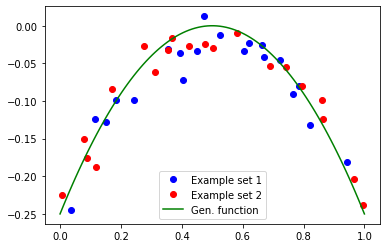

In [8]:
# plot the generating function, and the two sample datasets
plt.plot(x, y, 'bo')
plt.plot(x_test, y_test, 'ro')
plt.plot(x_grid, y_true, 'g-')
plt.legend(['Example set 1', 'Example set 2', 'Gen. function'])
xlim = plt.xlim()  # keep limits for plots to follow
ylim = plt.ylim()
plt.show()

How can I learn the generating function (green curve) from a noisy, finite set of training data (say, the blue points)? If I first learn from the blue points, how well will I predict the unseen red points, knowing that they were generated in the same way as the blue points?   

We usually start with noisy observations, rather than known generating functions, unless we design them. While more example points (i.e. a larger sample size) allow us to better discern the underlying process, we can always imagine finding more examples than we currently have. Those yet-unseen points might reveal additional variation in the underlying process, which the model would not have inferred from the points already seen. Any predictions based solely on the blue points may be fallible, and we need to be careful how much our model learns from a single set of examples.

### Capacity
<div class="alert alert-block alert-info">
    <b>Ability of a model to fit a wide variety of functions.</b>
</div>

- Model has a *hypothesis space* of possible functions.
  - Learning: exploration (e.g. by varying function parameters) to find functions in the space that better achieve the task.
- Representational capacity vs. effective capacity
  - Which functions could hypothetically be captured? <br>
    vs. Which functions can be captured given the practical limitations of the learning method?

- What if capacity is
  - Too high? Overfitting. 
  - Too low? Underfitting.
  - Just right? ... how do you know?

- Statistical learning theory: 
  - There's an upper limit to how much worse generalization error vs. training error
  - capacity, but shrinks with number of training examples. (In other words, more complex/flexible models tend to overfit to training data more, unless there are correspondingly higher sample sizes to constrain their flexibility.)
  - Simpler models tend to overfit less, but if we make them too simple they will underfit.
- Best performance: Matched to complexity of the task and the number of available examples.

Examples:
- Polynomial degree: quadratic model has higher capacity than linear model. <br>
  (i.e. quadratic hypothesis space is larger than linear hypothesis space)
- [Gaussian process kernels](https://en.wikipedia.org/wiki/Gaussian_process#/media/File:Gaussian_process_draws_from_prior_distribution.png)

### Underfitting and overfitting
1. Don't underfit: Make the training error small.    
   If the model can't even fit the training data well after training on many examples, it's probably too simple.
2. Don't overfit: Make the gap between training and generalization error small.     
   If the model fits the training data much better than new test examples, it's cheating.

<img src='./img/generalization.png'>
(Goodfellow <i>et al.</i>, 2016)

Let's fit some linear/polynomial models to our dataset from earlier, to show the effect of capacity on underfitting and overfitting.

In [9]:
from sklearn import linear_model

In [10]:
# add polynomial features to design matrix
# this allows us to perform polynomial regression with sklearn's LinearRegression class
def add_poly_terms(x, order=2):
    X = np.zeros((x.shape[0], order))
    X[:, 0] = np.copy(x)
    for col in range(1, order):
        X[:, col] = x ** (col + 1)
    return X

Try changing the order and re-plotting.
- 1: Linear; underfits the true (quadratic) generating function    
- 2: Best fit to generating function  
- 3+: Increasingly bad overfitting.  
    
Note that if the order of a polynomial is larger than the number of example points, it will always be able to 'cheat' and perfectly pass through all the points, regardless of the true generating distribution. Thus if you set `order=30` when `N=20`, the curve will be able to pass through ("memorize") all the blue points, without capturing the true generating function across the range of all possible inputs.

In [11]:
order = 1  # order of the polynomial (higher order -> higher capacity)
X = add_poly_terms(x, order)

reg = linear_model.LinearRegression().fit(X, y)
score = reg.score(X, y)
y_reg = reg.predict(add_poly_terms(x_grid, order))

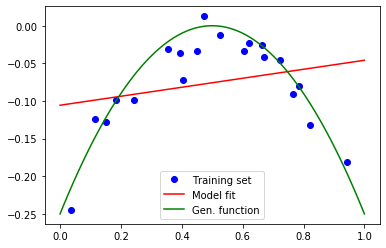

In [12]:
plt.plot(x, y, 'bo')
plt.plot(x_grid, y_reg, 'r-')
plt.plot(x_grid, y_true, 'g-')
plt.legend(['Training set', 'Model fit', 'Gen. function'])
plt.xlim(xlim)
plt.ylim(ylim)
plt.show()

We can also investigate how the capacity changes the training error, the test error (against the red points in our very first plot), and the true error (given our unusual knowledge of the true generating function). Note that "generalization error" may refer to the test error or the true error, in this case; though typically the true (or "oracular") error is unavailable and "generalization error" refers to any error calculated on examples not seen by the model during training.

Here, our performance measure is the <i>mean squared error</i>, or the sum of the square differences between datasets (e.g. between training points and the fitted model, for the training error).

In [13]:
def mse(y, y_ref):
    """Mean squared error: sum of squared differences between dataset and reference set."""
    return np.mean((y - y_ref)**2)

# training error: distance between blue points and equivalent points in model fit
train_err = mse(reg.predict(add_poly_terms(x, order)), y)
# test error: distance between red (unseen) points and equivalent points in model fit
test_err = mse(reg.predict(add_poly_terms(x_test, order)), y_test)
# & compare to the true function (not normally possible)
true_err = mse(y_reg, y_true)  
print("Training error:\t {:.4}".format(train_err))
print("Test error:\t {:.4}".format(test_err))
print("True error:\t {:.4}".format(true_err))

Training error:	 0.003559
Test error:	 0.006137
True error:	 0.00617


Try reproducing the error vs. capacity figure given earlier!

### Number of parameters
Example of a single-parameter model capturing arbitrarily complex functional relationships.
$$f_\theta(x)=\sin^2\left(2^{rx}\arcsin\sqrt{\theta}\right)$$
<img src='./img/single-param.png'>
(<a href="https://aip.scitation.org/doi/10.1063/1.5031956">Piantadosi, 2018</a>)

Technically it is possible for a single parameter to contain an infinite amount of information. In most models a single parameter corresponds to a limited amount of a capacity. However, depending on their situation within the model, different parameters may contribute to capacity differently. In more complex or non-linear models this can be quite stark, as seen in the example above.

### Ideal performance
- Ideal model: Oracle that knows the true distribution.
  - Errors are still possible! e.g. due to overlap/ambiguity of true distributions
- *Bayes error*: error incurred by an oracle (lower bound). <!-- e.g. overlapping true distributions -->

### Non-parametric models
- Data-driven; limit of infinite capacity.
- No parametrized function fixed prior to learning.
- Example: 
  - Wrap parametric learning algorithm inside another algorithm that optimizes no. of parameters as needed.
  - [Nearest neighbours](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm).

In nearest neighbour classification, the class of a new example is assigned based on the classes of the examples found nearest to it. 

The following figure shows training examples comprising three classes on the left, and the resulting 1-nearest neighbour classification regions. That is, if a new example falls in the blue region, its first nearest neighbour (the first-closest point to it) in the training set is blue, and thus the new example is also classified as blue. This does not depend on the fitting or determination (at least explicitly) of any functional parameters, and is solely dependent on the provided training data.

<img src='./img/1nn.png'>
(User:<a href="https://commons.wikimedia.org/wiki/File:Map1NN.png">Agor153</a> @ Wikipedia)

### No Free Lunch theorem
<div class="alert alert-block alert-warning">
    <b>"averaged over all possible data generating distributions, every classification algorithm has the same error rate when classifying previously unobserved points"</b>
</div>


$\rightarrow$ need to make assumptions about relevance of data generating distributions!

While this might seem to be a paradox at first---how can we decide on assumptions of relevancy without starting from assumptions of relevancy?---it is not so catastrophic if we assume that the universe (and the process of interest to our task) runs on a limited set of functions, and that these functions are in general not adversarial (i.e. directly interfering with our ability to learn) or non-conservative (i.e. changing faster than we could possibly learn) while we continue to collect examples.

### Regularization
<div class="alert alert-block alert-info">
    <b>Any modification to learning algorithm intended to <i>reduce generalization error</i> but not training error.</b>
</div>

- Additional constraints beyond the choice of hypothesis space of functions.
- Reduces overfitting.

#### Weight decay
<div class="alert alert-block alert-warning">
\begin{equation*}
    J\left(\mathbf{w}\right) = \mathrm{MSE}_\mathrm{train} + \lambda\mathbf{w}^{\top}\mathbf{w}
\end{equation*}
</div>

We may consider learning as optimization that minimizes a <i>loss function </i> (in this case, $J$). A loss function is analogous to a penalty on poor model behaviour, where larger losses correspond to worse performance. Equivalently, we may consider maximizing an <i>utility function</i>, which is analogous to a reward for desirable model behaviour. In either case (loss or utility) we may also refer to the performance measure as an <i>objective function</i>. The negation of a loss function may be thought of as an utility function.

Here, we add a term to the model's loss function: the sum of squares of the model parameters (i.e. weights/coefficients), or $\lambda\mathbf{w}^\top\mathbf{w}$. In this case, the <a href="https://en.wikipedia.org/wiki/Mean_squared_error">mean squared error</a> (MSE) is the loss function used prior to the addition of our weight decay term, and is essentially an estimate of the distance of the current estimates of the model parameters from their true values. (The exact calculation of MSE depends on the model.)

Since $J$ is a loss function and will be minimized during learning, so will the term $\lambda\mathbf{w}^\top\mathbf{w}$. But $\lambda\mathbf{w}^\top\mathbf{w}=\lambda\left(w_1^2 + w_2^2 + \dots + w_m^2\right)$, so learning will minimize the absolute value $|w_i|$ of each weight in $\mathbf{w}$.  

The magnitude of the penalty is scaled by the <i>hyperparameter</i> $\lambda$. When $\lambda=0$, there is no regularization by weight decay, and the model reverts to its unregularized form. When $\lambda$ is very large, all the model parameters will be driven to zero, and the model will tend to underfit. 

Weight decay helps to mitigate the problem of learning from features with [multi-collinearity](https://en.wikipedia.org/wiki/Multicollinearity), where model parameters may vary unrealistically when they are learned on different training sets (from the same generating function) due to correlations (informational redundancy) between them. For example, if I have two features that are perfectly correlated, then any one of many possible weightings of the two inputs can be used by the model for exactly the same effect on the output.

Weight decay (and regularization in general) will not improve underfitting resulting from low capacity, as it serves to <i>constrain</i> the hypothesis space.

Let's try adding regularization to our previous model. To do this, we use scikit-learn's `Ridge` class in place of `LinearRegression`. Ridge regression is simply linear regression with the same kind of weight decay regularization as given above. However, in this case the hyperparameter $\lambda$ is referred to as `alpha`.

Try changing alpha to 0 or a very large value (say, 100) for different values of `order`. 

In [26]:
order = 2
alpha = 0.01
X = add_poly_terms(x, order)

reg = linear_model.LinearRegression().fit(X, y)
y_reg = reg.predict(add_poly_terms(x_grid, order))
reg_ridge = linear_model.Ridge(alpha=alpha).fit(X, y)
y_ridge = reg_ridge.predict(add_poly_terms(x_grid, order))

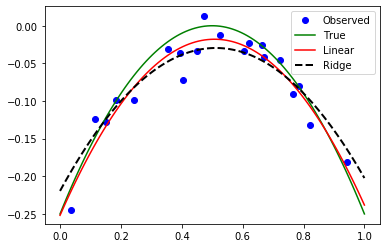

In [27]:
plt.plot(x, y, 'bo')
plt.plot(x_grid, y_true, 'g-')
plt.plot(x_grid, y_reg, 'r-')
plt.plot(x_grid, y_ridge, 'k--', lw=2)
plt.legend(['Observed','True','Linear','Ridge'])
plt.xlim(xlim)
plt.ylim(ylim)
plt.show()

Note that regularization reduces overfitting for higher values of `order`. This is because higher-order polynomial models can only overfit all the points perfectly if they can freely adjust their polynomial term weights (& thus their local curvature). However, weight decay forces those weights to be small (depending on $\lambda$).

### Hyperparameters
- Parameters of the learning algorithm itself.
- Can't optimize (along with  training set 
  - Will always optimize for higher capacity and overfitting, to reduce training error.
  - Need a *validation set* to estimate generalization error during training.
    <br>This is **not** the same as the test set that's left out for final validation at study completion.
  - Traditionally: Split given training set into 80%/20% training/validation.
- Example: 
  - Polynomial order (in example above).
  - Weight decay parameter, $\lambda$.

### Cross-validation
1. Split dataset into $k$ non-overlapping subsets
2. $k$ trials; on trial $i$, use $i$-th subset as validation set and remainder as training set. 
3. Average trial errors to estimate overall error.

Cross-validation is a popular and relatively robust way of estimating generalization error for the sake of optimizing hyperparameters and reducing overfitting. In this case the training set is split into many equally-sized pieces, the training is split into as many steps as there are pieces, and each piece takes a turn being the held-out/validation set, which the remaining pieces are used for training. At the end, the errors calculated on the validation sets of each step are averaged to give an overall estimate of the generalization error.

<img src='./img/crossval.png'>
(Ashfaque & Iqbal, 2019)

### Point estimators
i.e. "statistics"
<div class="alert alert-block alert-warning">
    <b>What is the best prediction for a quantity?</b>
</div>

- Any function of i.i.d. data points $\{\mathbf{x}^{(1)},\dots,\mathbf{x}^{(m)}\}$: $$\hat{\mathbf{\theta}}_m=g\left(\mathbf{x}^{(1)},\dots,\mathbf{x}^{(m)}\right)$$
- Good estimator: $\hat{\mathbf{\theta}}$ close to underlying $\mathbf{\theta}$
- Frequentism: true $\mathbf{\theta}$ fixed but unknown, and $\hat{\mathbf{\theta}}$ is function of the data; as the data is drawn from a random process, $\hat{\mathbf{\theta}}$ is a random variable.
- Example:
  - Weights in linear regression.
  - Functions ($\hat{f}$)

#### Bias
$$\mathrm{bias}\left(\hat{\mathbf{\theta}}_m\right)=\mathbb{E}\left(\hat{\mathbf{\theta}}_m\right)-\mathbf{\theta}$$
- Expectation over the data.
- <b>Unbiased</b> estimator: $\mathrm{bias}=0$, i.e. $\mathbb{E}(\hat{\mathbf{\theta}}_m)=\mathbf{\theta}$
  - <i>Asymptotically</i> unbiased if $\lim_{m\rightarrow\infty}\mathrm{bias}(\hat{\mathbf{\theta}}_m)$

#### Variance
$$\mathrm{Var}(\hat\theta)$$
- Square root of variance: standard error, $\mathrm{SE}(\hat{\theta})$
- Expected variation in estimate as we independently resample the dataset.


#### Bias-variance tradeoff
\begin{align*}
\mathrm{MSE}&=\mathbb{E}\left[(\hat{\theta}_m-\theta)^2\right] \\
            &=\mathrm{Bias}(\hat{\theta}_m)^2+\mathrm{Var}(\hat{\theta}_m)
\end{align*}
- Typically use cross-validation.
- May also compare MSE directly
  - MSE: Overall expected deviation
  - Small MSE: estimator keeping both bias and variance somewhat in check

<img src='./img/tradeoff.png'>
(Goodfellow <i>et al.</i>, 2016)

## Disentangling
- Factors of variation
- Separability vs. representation
- More complex example: object identity from perspective, location

Many state-of-the-art ML systems are concerned with <i>disentangling</i> the <i>real sources of variation</i> in data. For example, color, shape, and illumination are mixed up ('entangled') in photons landing on the retina, though they arise from different sources (physical causes) of variability.   

For example, the following diagram shows a comparison of the results of clustering methods based on <a href="https://en.wikipedia.org/wiki/Principal_component_analysis">principal components analysis</a> (PCA; left) versus <a href="https://en.wikipedia.org/wiki/Autoencoder">autoencoders</a> (right) as applied to samples of economic reports. The autoencoder is clearly better at disentangling the underlying variability. This behaviour may not be surprising to anyone who has used PCA themselves: the principal components do not correspond to disentangled properties like color, shape, or illumination, but rather arbitrary weighted combinations of different input features.

<img src='./img/pca_vs_vae-2.png'>
(<a href="https://www.sciencemag.org/cgi/doi/10.1126/science.1127647">Hinton & Salakhutdinov, 2006</a>)

## Summary
- Be careful what **assumptions** you make, and what work you do for your models
- Use held-out sets/**blinding** on multiple time scales
  - Short time scale: validation sets. Use *cross-validation* to optimize hyperparameters and improve estimation of generalization error during training.
  - Medium-to-long time scale: test sets. Should be *very* sparing; e.g. only evaluate test set error at study end.
  - There's still room for systemic improvement in the field; e.g. when making a dataset, hide one test set for 10 years to allow for retrospective analyses of derived publications.
- Think about how:
  - more complex models are *composed* from simpler models/principles.
  - different sources of variation/causality are *entangled* in data.